## 1. Quantities: 
This type of graph shows the levels of variables. Also, these graphs show the variables according to categories or classifications.

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

Datasets transformed into Latin characters. The following commands should be used in STATA:

cd "....\documents"

unicode analyze enaho.dta

unicode encoding set "latin1" 

unicode translate enaho.dta


### The following database includes enaho modules (200, 300 and 500) for the period 2011 - 20119

In [2]:
enaho = pd.read_stata(r"../_data/enaho.dta")
enaho

,year,conglome,vivienda,hogar,ubigeo,codperso,dominio,estrato,panel,p203,...,acumulado,estud,educa,d_edu,exper,exper_2,tenure_2,edad_2,jefe,ubigeo_2
0,2011,0061,077,11,010701,04,selva,"de 4,001 a 10,000 viviendas",2.011006e+14,hijo/hija,...,6.0,5.0,11.0,Secundaria completa,2.0,4.0,NaN,361.0,familiar,010000
1,2011,0110,112,11,010705,05,selva,Área de empadronamiento rural - aer compuesto,2.011011e+14,hijo/hija,...,6.0,5.0,11.0,Secundaria completa,3.0,9.0,9.0,400.0,familiar,010000
2,2011,0090,076,11,010205,03,selva,Área de empadronamiento rural - aer compuesto,2.011009e+14,nieto,...,6.0,5.0,11.0,Secundaria completa,5.0,25.0,36.0,484.0,familiar,010000
3,2011,0118,080,11,010401,03,selva,Área de empadronamiento rural - aer simple,2.011012e+14,hijo/hija,...,6.0,5.0,11.0,Secundaria completa,6.0,36.0,NaN,529.0,familiar,010000
4,2011,3408,066,11,010402,03,selva,Área de empadronamiento rural - aer compuesto,2.011341e+14,hijo/hija,...,6.0,5.0,11.0,Secundaria completa,3.0,9.0,0.0,400.0,familiar,010000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160767,2019,009703,084,11,250302,05,selva,"401 a 4,000 viviendas",2.019010e+16,yerno/nuera,...,11.0,4.0,15.0,Universitaria incompleta,0.0,0.0,NaN,441.0,familiar,250000
160768,2019,009675,124,11,250107,03,selva,"de 20,001 a 100,000 viviendas",2.019010e+16,hijo/hija,...,6.0,5.0,11.0,Secundaria completa,5.0,25.0,0.0,484.0,familiar,250000
160769,2019,009703,084,11,250302,04,selva,"401 a 4,000 viviendas",2.019010e+16,hijo/hija,...,6.0,5.0,11.0,Secundaria completa,9.0,81.0,0.0,676.0,familiar,250000
160770,2019,009700,143,11,250301,03,selva,"401 a 4,000 viviendas",2.019010e+16,hijo/hija,...,6.0,5.0,11.0,Secundaria completa,3.0,9.0,NaN,400.0,familiar,250000


### Number of companies classification by number of workers hired
Microbusinesses < 10 workers ;
Small businesses (10-20 workers);
Medium businesses (21-100 workers);
Big Businesses (>100 workers)

Text(0, 0.5, ' ')

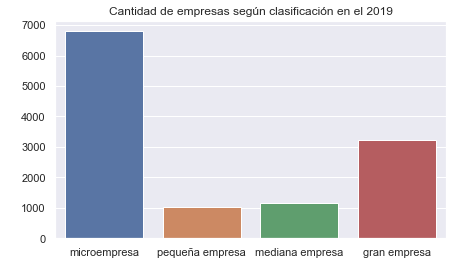

In [16]:
sns.set(style="darkgrid")

#figure size

fig, ax = plt.subplots(figsize=(7,4))

x = sns.countplot(x="empresa", data=enaho[enaho['year'] == "2019" ])

plt.title('Cantidad de empresas según clasificación en el 2019')
plt.xlabel(' ')
plt.ylabel(' ')

###### Vertical Countplot and one color (red)

Text(0, 0.5, ' ')

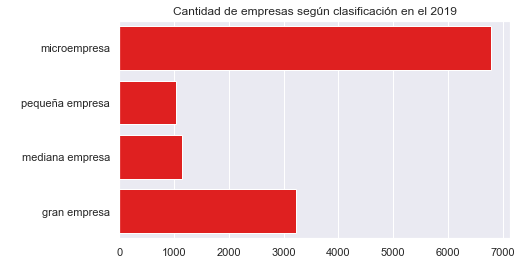

In [28]:
sns.set(style="darkgrid")
fig, ax = plt.subplots(figsize=(7,4))

x = sns.countplot(y = "empresa", data=enaho[enaho['year'] == "2019" ], color = 'red')

plt.title('Cantidad de empresas según clasificación en el 2019')
plt.xlabel(' ')
plt.ylabel(' ')

### Evolutions of business in period 2017-2019



Text(0.2, 0.01, 'Elboración propia - ENAHO (2011-2019)')

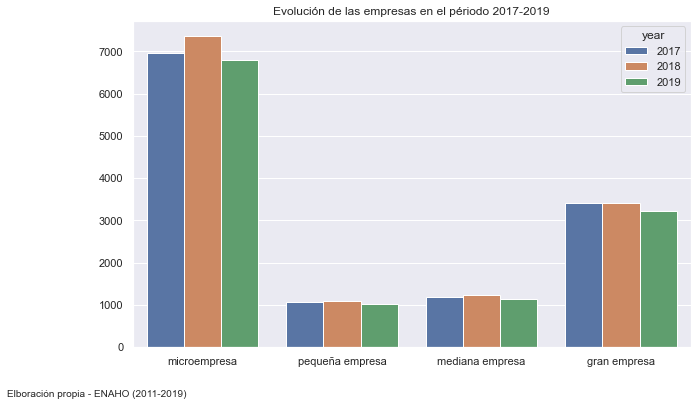

In [4]:
base2 = enaho[enaho['year'] > "2016" ]

fig, ax = plt.subplots(figsize=(10,6))

# hue: variable descomposition

ax = sns.countplot(x="empresa", hue="year", linewidth=1, data=base2)
plt.title('Evolución de las empresas en el périodo 2017-2019')
plt.xlabel(' ')
plt.ylabel(' ')
txt="Elboración propia - ENAHO (2011-2019)"  
plt.figtext(0.2, 0.01, txt, wrap=True, horizontalalignment='right', fontsize=10)

### Number of companies by strata (urbano o rural) and evolution by years

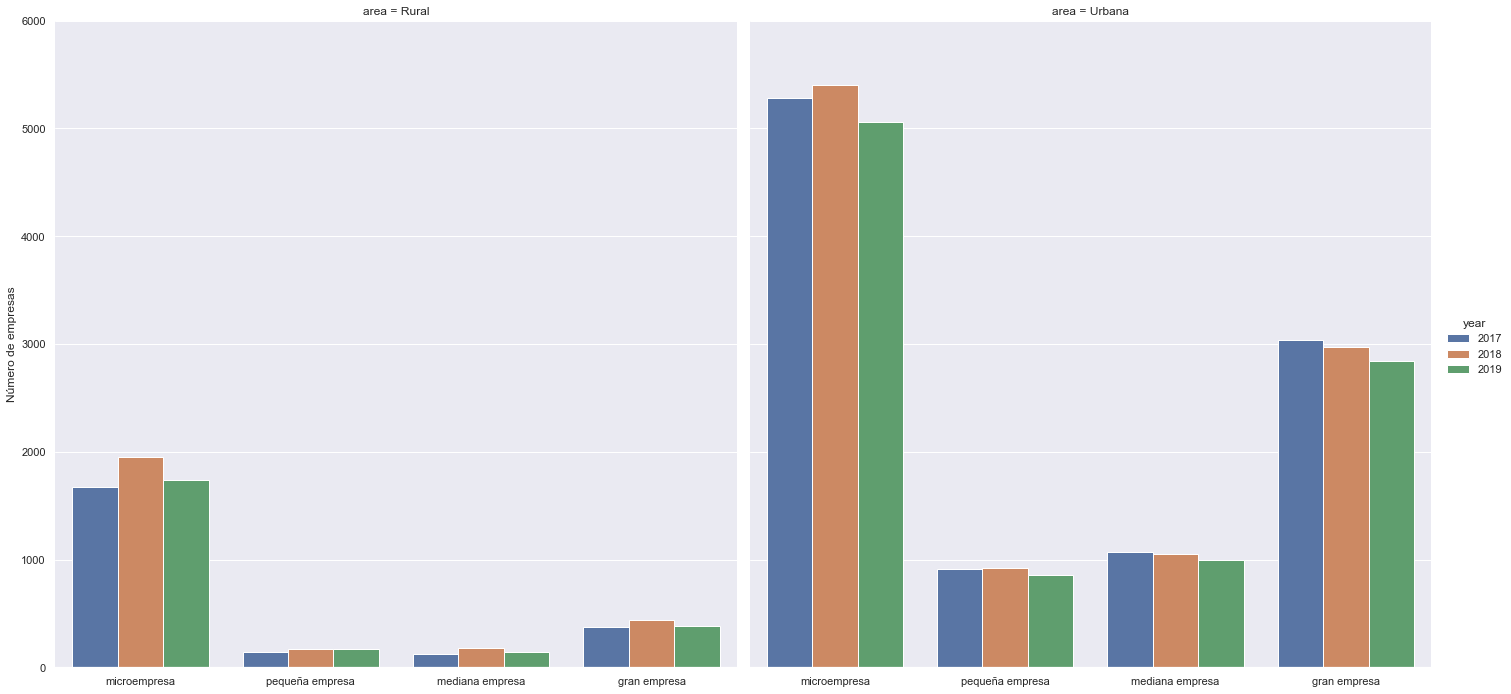

In [15]:
ag = sns.catplot(x="empresa", hue="year", col= "area" , data= base2, kind="count", height=10, aspect=1);

(ag.set_axis_labels("", "Número de empresas")
  .set(ylim=(0, 6000))
  .despine(left=True)) 

#### Number of businesses by strata - stacked bar plot

Text(0.5, 0, ' ')

<Figure size 720x72 with 0 Axes>

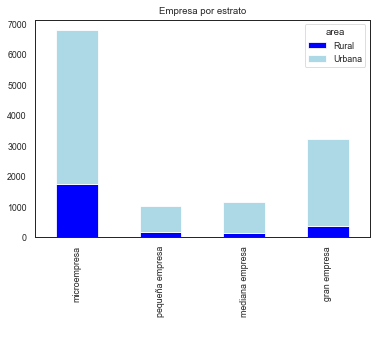

In [86]:
# count businesses by strata using groubpy (similar collapse - stata)
base_2 = enaho[enaho['year'] == "2019" ].groupby( [ 'empresa', 'area' ], as_index = False)[['conglome']].count()

# stacked information
base_3 = base_2.pivot(index = 'empresa', columns = 'area', values = 'conglome')
base_3

base_3.plot(kind='bar',stacked=True,title='Empresa por estrato', color = ['blue', 'lightblue'])
plt.xlabel(' ')

## 2. Proportions

Understandable plots to show categorical variables. Use this plots to explain participations from categories. 

### Pie 

##### First at all, collapse dataframe to count categories of a variable 

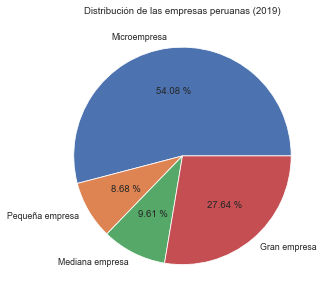

In [89]:
base = enaho.groupby([ 'empresa' ]).count()

# Labels to correct categories names 

labels=['Microempresa','Pequeña empresa' , 'Mediana empresa', 'Gran empresa']

plt.figure(figsize=(5,5))

ax = plt.pie(base['conglome'], labels=labels, autopct='%.2f %%')
plt.title('Distribución de las empresas peruanas (2019)')
plt.show()



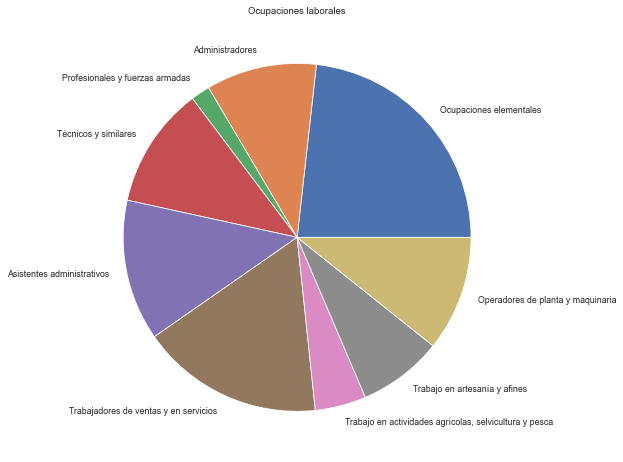

In [87]:
base = enaho.groupby('labor').size()

base.plot(kind='pie', subplots=True, figsize=(8, 8))
plt.title("Ocupaciones laborales")
plt.ylabel("")
plt.show()

## Donuts

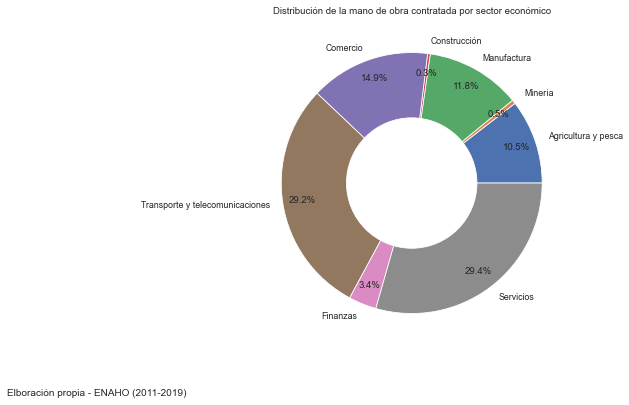

In [83]:
base2 = enaho.groupby([ 'sector' ]).count()

labels=['Agricultura y pesca','Minería','Manufactura','Construcción','Comercio','Transporte y telecomunicaciones', 'Finanzas', 'Servicios']
plt.figure(figsize=(10, 6))

ax = plt.pie(base2['conglome'], labels=labels,
        autopct='%1.1f%%', pctdistance=0.85)
  
# centroid size and color

center_circle = plt.Circle((0, 0), 0.50, fc='white')
fig = plt.gcf()

fig.gca().add_artist(center_circle)
  
plt.title('Distribución de la mano de obra contratada por sector económico')

# Adding notes

txt="Elboración propia - ENAHO (2011-2019)"  
plt.figtext(0.2, 0.01, txt, wrap=True, horizontalalignment='right', fontsize=10)

plt.show()

## 3. Distributions

Distribution plots visually assess the distribution of sample data by comparing the empirical distribution of the data with the theoretical values expected from a specified distribution.

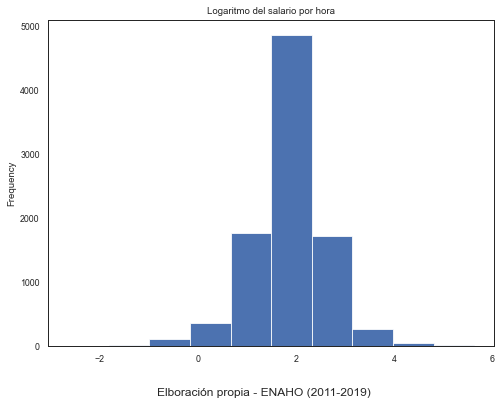

In [91]:
#filter database to 2019
base4 = enaho[enaho['year'] == "2019" ]


base4['l_salario'].plot(kind = 'hist', bins = 10, figsize = (8,6))
plt.title('Logaritmo del salario por hora')

txt="Elboración propia - ENAHO (2011-2019)"  
plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=12)
plt.show()

### Reducing intervals 

Frequency distribution with a smaller interval (lower relative frequency). Therefore, the height of each bar accounts smaller amount.

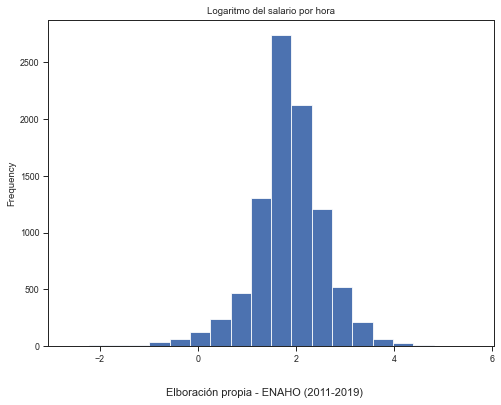

In [22]:
sns.set('paper')
sns.set_style("ticks")

base4['l_salario'].plot(kind = 'hist', bins = 20, figsize = (8,6))
plt.title('Logaritmo del salario por hora')

txt="Elboración propia - ENAHO (2011-2019)"  
plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=11)
plt.show()

### Multiple histograms

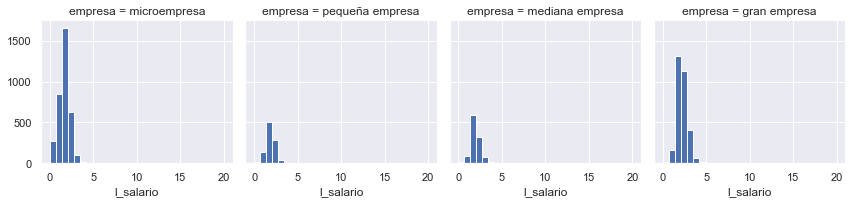

In [306]:
figure1 = sns.FacetGrid(base4, col="empresa", margin_titles=True)
figure1.map(plt.hist, 'l_salario', bins=np.linspace(0, 20, 30))

##### Real salary per hour density: 
the distribution does not resemble a standard normal. The information is concentrated in lower values and there are some observations of high values.

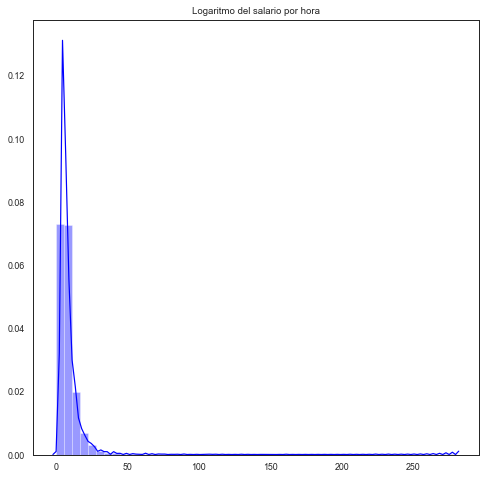

In [114]:
plt.figure(figsize=(8, 8))

sns.distplot(base4['salario'], label = "Densidad", color = 'blue')
plt.title('Logaritmo del salario por hora')
plt.xlabel(' ')
plt.show()

### Logarithm of real hourly wage

This allows correcting the asymmetry presented by the original data.

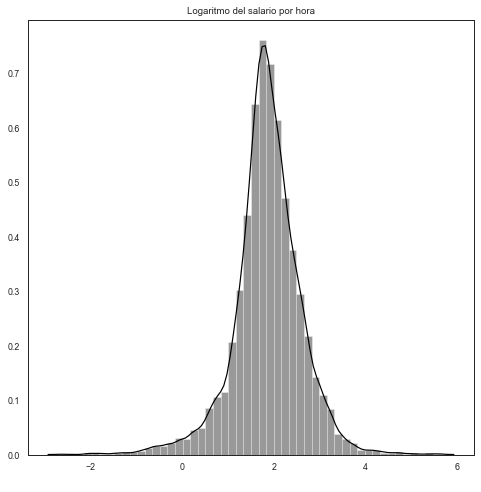

In [109]:
#Alternative figure size
plt.figure(figsize=(8, 8))

sns.distplot(base4['l_salario'], label = "Densidad", color = 'black')
plt.title('Logaritmo del salario por hora')
plt.xlabel(' ')
plt.show()

#### Real salaries for tres sectors (Construction, Mining and services)


Text(0.5, 0, 'Logaritmo del salario')

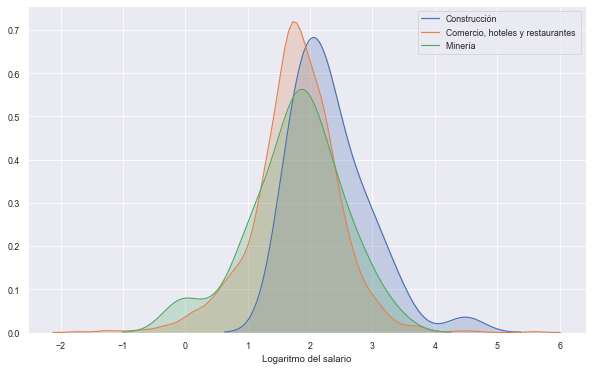

In [160]:
plt.figure(figsize=(10, 6))

#Adding densities 

sns.kdeplot(base4.l_salario[base4.sector=='Construcción'], label='Construcción', shade=True)
sns.kdeplot(base4.l_salario[base4.sector=='Comercio, hoteles y restaurantes'], label='Comercio, hoteles y restaurantes ', shade=True)
sns.kdeplot(base4.l_salario[base4.sector=='minería'], label='Minería ', shade=True)
plt.xlabel('Logaritmo del salario')

# Construction sector shows certain stochastic dominance over mining and services

### Labor occupations and real salary per hour densities

A For loop is used to include in the same graph the density function of hourly wages for different occupations.

Text(0.5, 0, 'Logaritmo del salario por tipo de ocupación')

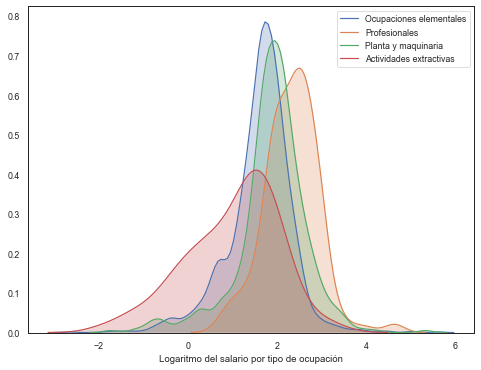

In [113]:
fig, ax = plt.subplots(figsize=(8,6))
sector = [ 'Ocupaciones elementales', 'Profesionales y fuerzas armadas', 'Operadores de planta y maquinaria',
          'Trabajo en actividades agrícolas, selvicultura y pesca']
nombre = [ 'Ocupaciones elementales', 'Profesionales', 'Planta y maquinaria','Actividades extractivas']
    
for a, b in zip(sector, nombre):
        sns.kdeplot(base4.l_salario[base4.labor==a], label=b, shade=True)

plt.xlabel('Logaritmo del salario por tipo de ocupación')

# Two relevant findings: stochastic dominance of the salary of professionals and 
# concentration in lower levels of salary in the non-active primary sector.

### Box plot real salary and education 



[Text(0, 0, 'Sec. completa'),
 Text(0, 0, 'No uni. incompleta'),
 Text(0, 0, 'No uni. completa'),
 Text(0, 0, 'Uni. incompleta'),
 Text(0, 0, 'Uni. completa'),
 Text(0, 0, 'Posgrado')]

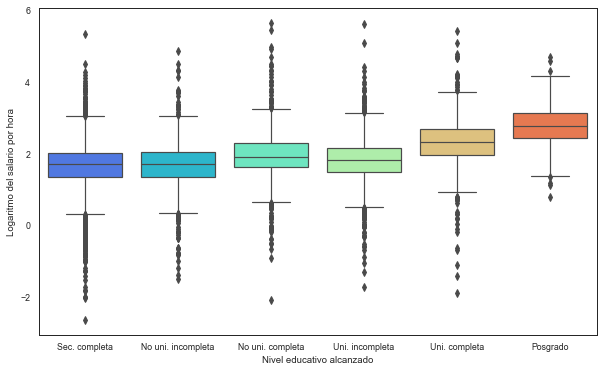

In [116]:
fig, ax = plt.subplots(figsize=(10,6))

box = sns.boxplot(x="educ", y="l_salario", data=enaho[enaho['year'] == "2019" ] ,palette='rainbow')
plt.xlabel('Nivel educativo alcanzado')
plt.ylabel('Logaritmo del salario por hora')
(box.set_xticklabels(["Sec. completa", "No uni. incompleta", "No uni. completa", "Uni. incompleta", "Uni. completa", "Posgrado"]))

# The real wage quartiles are increasing with the educational level.
# Lower salary dispersion for the postgraduate level.


## 4. Relationships

Charts used for both time series and cross-sectional data. These graphs allow to establish certain evidence of correlation or relationships between variables.

### Scatter plot 

First, a random sample is drawn from the original database. Subsequently, a dispersion graph is presented between the hourly wage (logarithm) and the non-labor monthly income (logarithm).

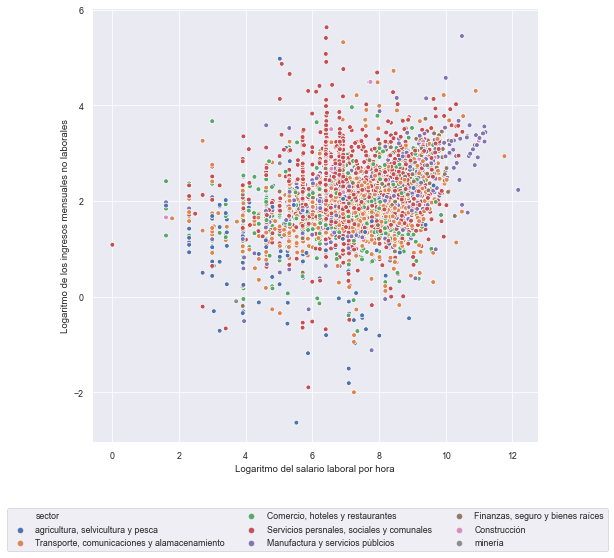

In [178]:
#Full sample

sns.set('paper')
plt.figure(figsize=(8, 8))
plot = sns.scatterplot(data=base4, x="l_n_labor", y="l_salario", hue="sector", palette="deep")

plt.xlabel('Logaritmo del salario laboral por hora')
plt.ylabel('Logaritmo de los ingresos mensuales no laborales')

# By default legend inside plot. Following codes allow us to put outside. 
# bbox_to_anchor: box location
# ncol: # columns of legend

plot.legend(loc='center left', bbox_to_anchor=(-0.2, -0.2), ncol=3)

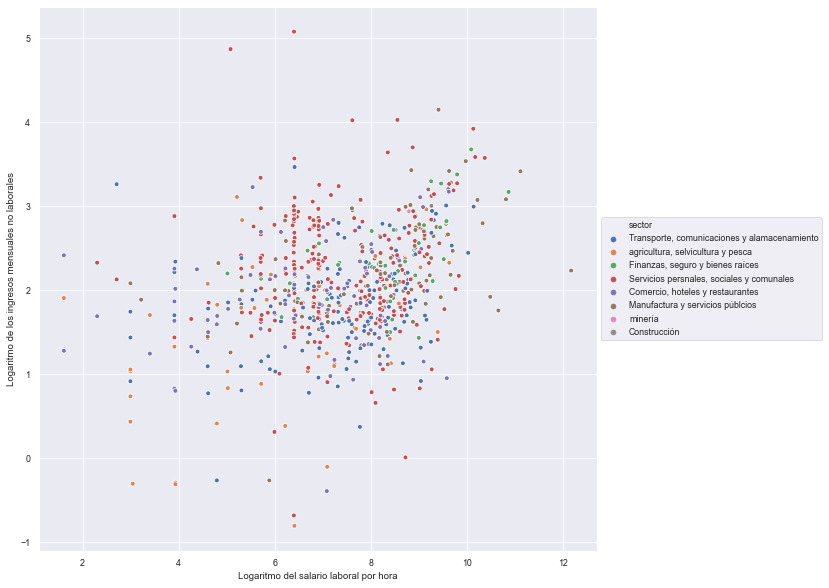

In [177]:
# Ramdon sample n = 3000

base5 = base4.sample(n = 3000)

sns.set('paper')
plt.figure(figsize=(10, 10))
plot = sns.scatterplot(data=base5, x="l_n_labor", y="l_salario", hue="sector", palette="deep")

plt.xlabel('Logaritmo del salario laboral por hora')
plt.ylabel('Logaritmo de los ingresos mensuales no laborales')

plot.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)

#### Reggresion real salary per hour and  non-labor income by strata

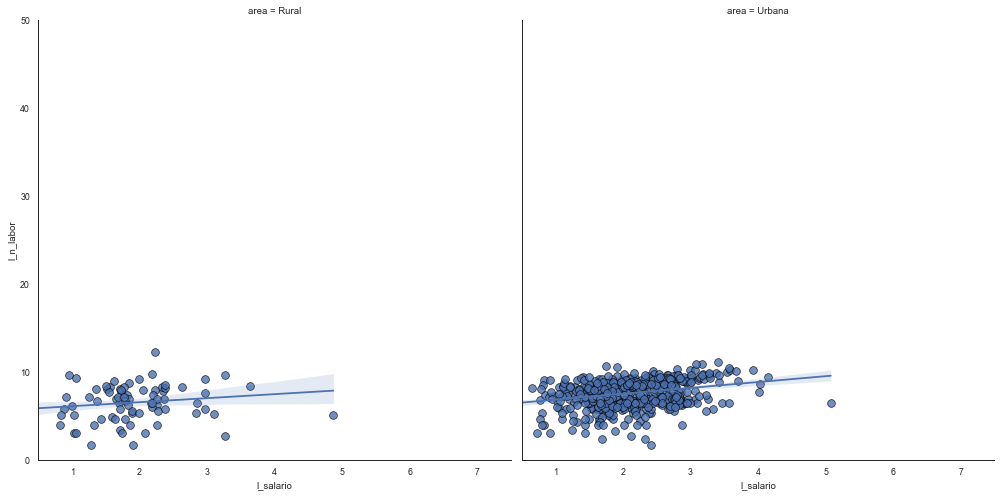

In [179]:
sns.set_style("white")
gridobj = sns.lmplot(x="l_salario", y="l_n_labor", 
                     data=base5, 
                     height=7, 
                     robust=True, 
                     palette='Set1', 
                     col="area",
                     scatter_kws=dict(s=60, linewidths=.7, edgecolors='black'))

gridobj.set(xlim=(0.5, 7.5), ylim=(0, 50))
plt.show()

## Macroeconomics 
IMP: log-Commodity price index, TC: log-exchange rate, RIN: log-international reserves, IPC: log-price consumption index, RATE: central bank rate reference

D: Annual difference

In [181]:
macro = pd.read_csv(r"../_data/macroeconomia.csv")
macro['YEAR']  = pd.to_datetime(macro['Fecha'])
macro

,Fecha,IPM,TC,RIN,IPC,RATE,DIPM,DTC,DRIN,DIPC,YEAR
0,2003-1,2.83506,1.25634,9.18519,4.41828,3.7500,13.73166,0.83108,12.50532,2.25690,2003-01-01
1,2003-2,2.85371,1.25004,9.21777,4.42295,3.8000,12.48664,0.16400,13.17984,2.76396,2003-02-01
2,2003-3,2.84717,1.24993,9.24303,4.43407,3.8200,7.76170,0.65330,17.18115,3.33857,2003-03-01
3,2003-4,2.80982,1.24554,9.24188,4.43356,3.8400,1.97256,0.69980,13.92729,2.56103,2003-04-01
4,2003-5,2.88617,1.24686,9.23065,4.43324,3.7800,6.81493,0.92160,12.37214,2.39028,2003-05-01
...,...,...,...,...,...,...,...,...,...,...,...
199,2019-8,3.74485,1.22252,11.12236,4.88368,2.5642,3.71183,2.73013,12.37958,2.01920,2019-08-01
200,2019-9,3.74443,1.20844,11.12124,4.88375,2.5038,7.63091,1.29986,15.82517,1.83408,2019-09-01
201,2019-10,3.70510,1.20622,11.13029,4.88486,2.5045,0.48716,0.71850,15.12033,1.86310,2019-10-01
202,2019-11,3.69955,1.20500,11.11988,4.88594,2.2984,0.97267,-0.08858,11.80591,1.84959,2019-11-01


Text(0.5, 0.01, 'Elboración propia - BCRP')

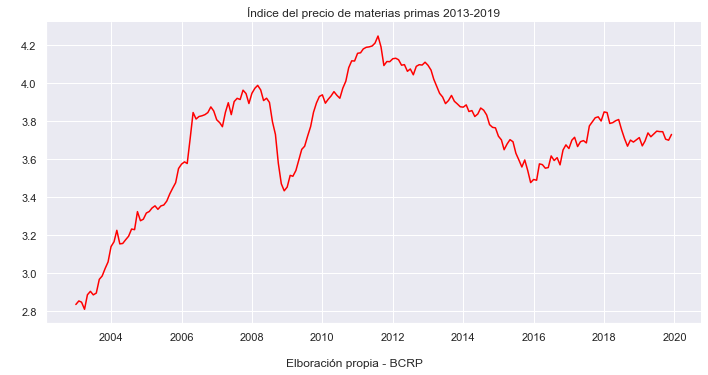

In [312]:
sns.set('notebook')

sns.relplot(x="YEAR", y="IPM", kind="line", color="red", data=macro, height=5, aspect=2)
plt.xlabel(' ')
plt.ylabel(' ')
plt.title('Índice del precio de materias primas 2013-2019')

txt="Elboración propia - BCRP"  
plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=12)

#### Series in a single image

This graph shows a positive relationship between the change in international reserves and the commodity index.

Text(0.2, 0.01, 'Elaboración propia - BCRP')

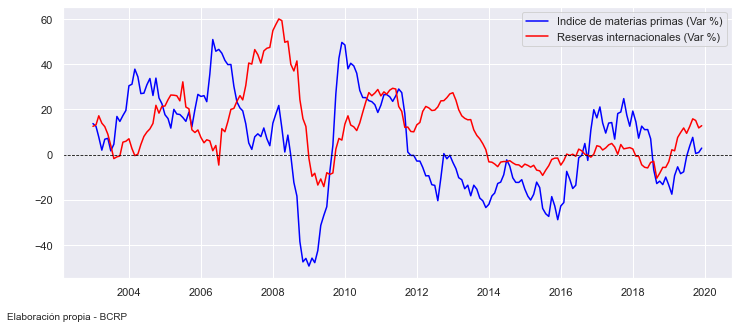

In [279]:
sns.set('notebook')


fig, ax = plt.subplots(figsize=(12,5))

x = macro['YEAR']
y1 = macro['DIPM']
y2 = macro['DRIN']

plt.plot(x, y1, label ='Indice de materias primas (Var %)', color='blue')
plt.plot(x, y2, label ='Reservas internacionales (Var %)', color='red')
plt.axhline(y=0, color='black', linestyle='--', lw=0.8)

plt.legend(loc='upper right')

txt="Elaboración propia - BCRP"  
plt.figtext(0.2, 0.01, txt, wrap=True, horizontalalignment='right', fontsize=10)

### Dual-line Plots

#### Exchange rate and monetary policy reaction

Text(0.2, 0.01, 'Elboración propia - BCRP')

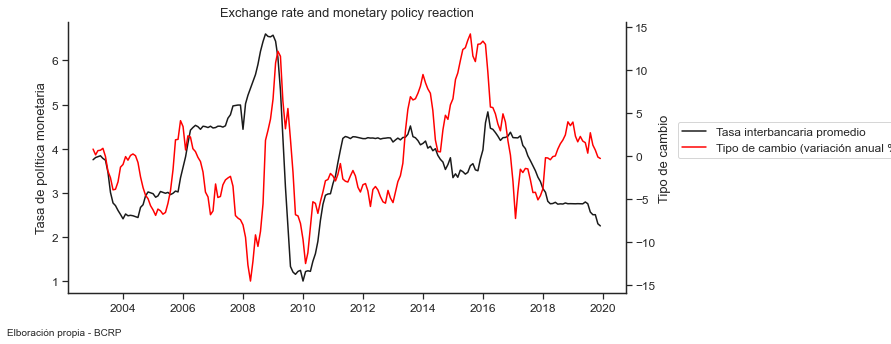

In [292]:
sns.set('notebook', style = "ticks", font_scale= 1.08)

fig, ax = plt.subplots(figsize=(10,5))
lineplot = sns.lineplot(x= "YEAR" , y= "RATE", data=macro, 
                        label = 'Tasa interbancaria promedio ', color="k", legend=False)

#sns.despine()
plt.ylabel('Tasa de política monetaria')
plt.xlabel(' ')
plt.title('Exchange rate and monetary policy reaction');

ax2 = ax.twinx()
lineplot2 = sns.lineplot(x= "YEAR", y= "DTC", data=macro, ax=ax2, color = "red", 
                         label ='Tipo de cambio (variación anual %)', legend=False) 
sns.despine(right=False)
plt.ylabel('Tipo de cambio')
ax.figure.legend(loc='lower center', bbox_to_anchor=(1.1, 0.5), ncol=1);


txt="Elboración propia - BCRP"  
plt.figtext(0.2, 0.01, txt, wrap=True, horizontalalignment='right', fontsize=10)

#### Reference:

#### Library of plots 

https://www.python-graph-gallery.com/stacked-and-percent-stacked-barplot

#### Seaborn package:

https://seaborn.pydata.org/generated/seaborn.catplot.html

https://programmerclick.com/article/54791895404/